# Aufgabe 7 Test und Dokumentation

## Video

Die Konvertierung eines beliebigen Videos zum MJPEG Format hat leider nicht geklappt.

## Parameterwahl

Die subjektiv beste Einstellung für die Gruppengröße der Fehlerkorrektur mittles FEC bei einer Kanalverlustrate von 10% lag bei k=9. Seltene Bildfehler bei geringer Redundanz. 
Bei Gruppengrößen von k>10 waren mehr Fehler zu erkennen. 

## Bestimmung der theoretisch zu erwartenden Verlustraten



### Formeln

<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/katex@0.16.4/dist/katex.min.css" integrity="sha384-vKruj+a13U8yHIkAyGgK1J3ArTLzrFGBbBc0tDp4ad/EyewESeXE/Iv67Aj8gKZ0" crossorigin="anonymous">
<script type="module">
    import renderMathInElement from "https://cdn.jsdelivr.net/npm/katex@0.16.4/dist/contrib/auto-render.mjs";
    renderMathInElement(document.body);
</script>

$$
\begin{gather}

\boxed{P_r = 1 - \bigg[(1-P_e)^{k+1} + \binom{k+1}{1}P_e \cdot (1-P_e)^k \bigg]}\\
\text{(Restfehlerwahrscheinlichkeit aus der Vorlesung)}\\[2em]

P_{nk} \subset P_e \\[1em]

\begin{split}
P_r &= \mathbb{P}(P_{nk} \mid P_e) \\
    &= \frac{\mathbb{P}(P_{nk} \cap P_e)}{P_e} \stackrel{(2)}{=} \frac{P_{nk}}{P_e}
\end{split}\\[2em]

P_{nk} = P_r \cdot P_e\\[2em]

P_r = \frac{P_{nk}}{P_e} = \frac{P_{nk} \cdot n}{P_e \cdot n} = \frac{n_{nk}}{n_e}\\[1em]
P_{nk} \stackrel{(4)(5)}{=} \frac{n_{nk}}{n_e} \cdot P_e = \frac{n_{nk}}{\cancel{P_e} \cdot n} \cdot \cancel{P_e} = \frac{n_{nk}}{n}
\end{gather}
$$

### Experimentelle bestimmung der Restfehlerwahrscheinlichkeit:

1. Festlegen sinnvoller X-Achsen-Abschnitte (Messpunkte):

   ```python
   expX = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
   ```

2. Einstellen der Kanalverlustrate (X-Wert) und Gruppengröße (Messdomäne) im `Server`.
3. Aktivieren von FEC im `Client`.
4. <kbd>Setup</kbd> und <kbd>Play</kbd> im Client klicken.
5. Video zu Ende streamen lassen.
6. FEC-Statistiken Restfehlerrate / Paketverlustrate (nicht korr.) ablesen und als Y-Wert eintragen.


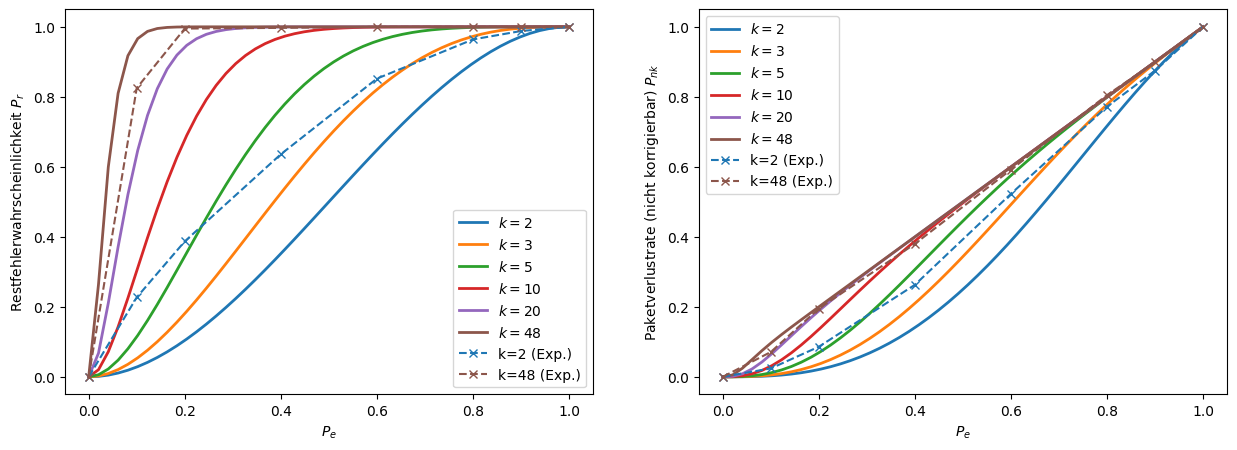

In [138]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math


def P_r(P_e, k):  # Restfehlerwahrscheinlichkeit
    return 1 - (
        ((1 - P_e) ** (k + 1))  # Wkt.: alle Pakete einer (Gruppe+FEC) empfangen
        #
        + (  # Wkt.: 1 Paket einer (Gruppe+FEC) nicht empfangen (kann korrigiert werden)
            math.comb(k + 1, 1) * P_e * ((1 - P_e) ** k)
        )
    )


x = np.linspace(0, 1)
expX = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1]

# plot
fig, (pltRestfehler, pltPaketverlustNichtKorr) = plt.subplots(1, 2, figsize=(15, 5))


for k in [2, 3, 5, 10, 20, 48]:
    pltRestfehler.plot(x, P_r(x, k), linewidth=2.0, label=f"$k={k}$")
    pltPaketverlustNichtKorr.plot(x, P_r(x, k) * x, linewidth=2.0, label=f"$k={k}$")


pltRestfehler.plot(
    expX,
    [0, 0.227, 0.387, 0.636, 0.852, 0.964, 0.988, 1],
    "x--",
    label="k=2 (Exp.)",
    color="tab:blue",
)
pltPaketverlustNichtKorr.plot(
    expX,
    [0, 0.024, 0.086, 0.263, 0.523, 0.772, 0.875, 1],
    "x--",
    label="k=2 (Exp.)",
    color="tab:blue",
)

pltRestfehler.plot(
    expX,
    [0, 0.825, 0.995, 0.997, 1, 1, 1, 1],
    "x--",
    label="k=48 (Exp.)",
    color="tab:brown",
)
pltPaketverlustNichtKorr.plot(
    expX,
    [0, 0.071, 0.195, 0.38, 0.592, 0.805, 0.899, 1],
    "x--",
    label="k=48 (Exp.)",
    color="tab:brown",
)

pltRestfehler.legend()
pltPaketverlustNichtKorr.legend()

pltRestfehler.set(xlabel="$P_e$", ylabel="Restfehlerwahrscheinlichkeit $P_r$")
pltPaketverlustNichtKorr.set(
    xlabel="$P_e$", ylabel="Paketverlustrate (nicht korrigierbar) $P_{nk}$"
)
# pltRestfehler.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()


- Messung unterliegt zufälligen Schwankungen
- ~~FEC-Pakete sind nicht in der Statistik gezählt~~
- Kanalfehlerwahrscheinlichkeit ist nicht wirklich zufällig -> Pseudo-Random



## Kompatibilität

Mit der neuesten VLC Version 3.0.18 war es möglich, das Video erfolgreich zu empfangen. Dafür durfte nur der Server gestartet werden, weil sonst der programmierte Client die Verbindung verhindern würde.
In VLC musste dafür der richtige RTSP Pfad angegeben werden: `rtsp://localhost:8554/htw.mjpeg`.

## Dokumentation

Es wurde der vorhandene FecHandler verwendet.

## Vorschläge

- Verbesserung der Verständlichkeit des vorgegebenen Quellcodes. Durch z.B. einheitliche Formatierung und Benennung, die Trennung von fertigen Klassen (libs) und zu bearbeitenden Klassen, das Löschen von unbenutztem Code.
- Behebung der Fehler im vorgegebenen Code. Bei Gruppengrößen von k>2 wurde das Abspielen regelmäßig durch unbehandlete Exceptions unterbrochen. Darunter zählten invalide JPEG-Frames und ein Fehler beim Erstellen eines neuen RTPPackets durch zu große Indizes beim Ausführen von `System.arraycopy`.
- Implementierung von Interpolation, sodass nicht korrigierbare Pakete zu weniger auffälligen Bildfehlern wie leeren Frames führen.
- Anpassung der Kanalverlustrate während des Abspielens.
- Korrigieren des unerklärlich schrumpfenden Puffers.
- Terminate resettet nicht die Wiedergabe, Puffer und Statistiken.
- Server anpassen, sodass mehrere Clients gleichzeitig bedient werden können.
